In [1]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection.split import train_test_split
from surprise.model_selection import cross_validate, GridSearchCV
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from surprise import KNNBasic, KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import accuracy
from sklearn import preprocessing
from surprise import CoClustering
import os, io

In [2]:
df  = pd.read_csv('data/automotive.csv',delimiter=",")# read csv into ratings_df dataframe

In [3]:
print(df.head())

   Unnamed: 0  overall  verified   reviewTime      reviewerID        asin  \
0           1        1      True  04 19, 2018   ABCA1A8E4DGV1  0209688726   
1           2        1      True  04 16, 2018  A1NX8HM89FRQ32  0209688726   
2           3        3      True  04 13, 2018  A1X77G023NY0KY  0209688726   
3           4        5      True   04 8, 2018  A3GK37JO2MGW6Q  0209688726   
4           5        5      True  03 24, 2018   AIY18YON1TWJJ  0209688726   

                  style  unixReviewTime  
0   {'Color:': ' Blue'}      1524096000  
1  {'Color:': ' Black'}      1523836800  
2     {'Color:': ' CA'}      1523577600  
3  {'Color:': ' Black'}      1523145600  
4  {'Color:': ' Black'}      1521849600  


In [3]:
df = df[['reviewerID','asin','overall']]

In [4]:
print(df.head())

       reviewerID        asin  overall
0   ABCA1A8E4DGV1  0209688726        1
1  A1NX8HM89FRQ32  0209688726        1
2  A1X77G023NY0KY  0209688726        3
3  A3GK37JO2MGW6Q  0209688726        5
4   AIY18YON1TWJJ  0209688726        5


In [5]:
df.isna().sum()

reviewerID    0
asin          0
overall       0
dtype: int64

In [6]:
df.shape

(936196, 3)

In [7]:
df.describe()

,overall
count,936196.000000
mean,4.474212
std,1.054637
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df['overall'].value_counts()

5    686420
4    124176
3     53338
1     44603
2     27659
Name: overall, dtype: int64

(array([ 44603.,      0.,  27659.,      0.,      0.,  53338.,      0.,
        124176.,      0., 686420.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

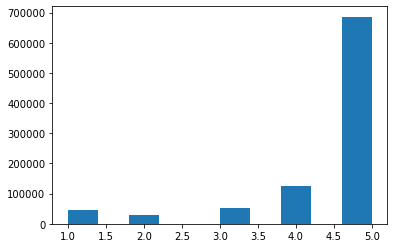

In [9]:
plt.hist(df['overall'])

In [10]:
df_duplicated =df.copy()

In [11]:
df_duplicated = df.drop_duplicates(['reviewerID','asin'])

In [12]:
df_duplicated.shape

(911347, 3)

In [13]:
df = df_duplicated

In [14]:
df.columns = ['uid', 'iid','rating']

In [15]:
reader = Reader(rating_scale=(1,5))
data=Dataset.load_from_df(df,reader)

In [16]:
trainingSet, testSet = train_test_split(data, test_size=0.2, train_size=None, random_state=None, shuffle=True)

In [17]:
algo_svd = SVD()
algo_svd.fit(trainingSet)
algo_svdpp = SVDpp()
algo_svdpp.fit(trainingSet)
algo_cluster = CoClustering()
algo_cluster.fit(trainingSet)

In [18]:
predictions_svd = algo_svd.test(testSet)

In [19]:
predictions_cluster = algo_cluster.test(testSet)

In [20]:
predictions_svdpp = algo_svdpp.test(testSet)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy.rmse(predictions_svd, verbose=True) 

RMSE: 0.9896


0.9895825626132507

In [23]:
accuracy.rmse(predictions_svdpp, verbose=True) 

RMSE: 0.9847


0.9846874959139319

In [24]:
accuracy.rmse(predictions_cluster, verbose=True) 

RMSE: 1.0824


1.0823601747321352